In [52]:
import random
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import special as sp

In [18]:
data = np.linspace(-5, 5, 100)

In [11]:
def uniform_pdf(x):
    return 1 if 0 <= x < 1 else 0


def uniform_cdf(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

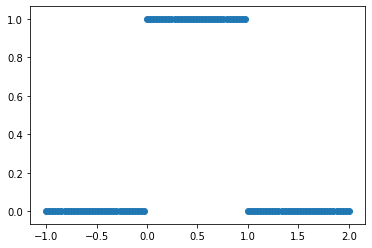

In [13]:
plt.scatter(data, [uniform_pdf(i) for i in data])

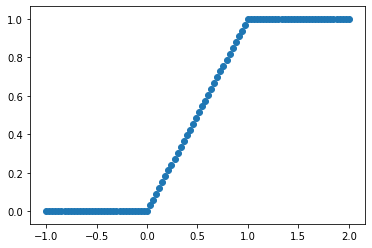

In [14]:
plt.scatter(data, [uniform_cdf(i) for i in data])

In [29]:
def normal_pdf(x, mu=0, sigma=1):
    return 1 / np.sqrt(2 * np.pi * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def normal_cdf(x, mu=0, sigma=1):
    return (1 + sp.erf((x - mu) / np.sqrt(2 * sigma ** 2))) / 2

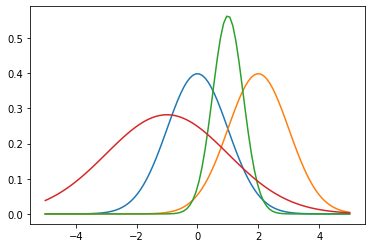

In [27]:
plt.plot(data, [normal_pdf(i) for i in data])
plt.plot(data, [normal_pdf(i, 2) for i in data])
plt.plot(data, [normal_pdf(i, 1, 0.5) for i in data])
plt.plot(data, [normal_pdf(i, -1, 2) for i in data])

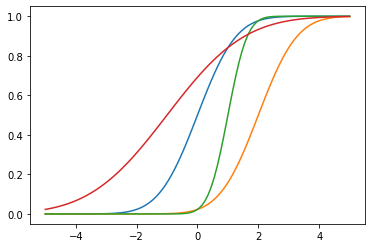

In [30]:
plt.plot(data, [normal_cdf(i) for i in data])
plt.plot(data, [normal_cdf(i, 2) for i in data])
plt.plot(data, [normal_cdf(i, 1, 0.5) for i in data])
plt.plot(data, [normal_cdf(i, -1, 2) for i in data])

In [36]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

In [46]:
inverse_normal_cdf(0.6)

0.2533435821533203

In [48]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0


def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [60]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar(
        [x for x in histogram.keys()],
        [v / num_points for v in histogram.values()],
        0.8
    )
    
    mu = p * n
    sigma = np.sqrt(n * p * (1 - p))
    
    xs = np.linspace(min(data), max(data), 100)
    ys = [normal_cdf(x + 0.5, mu, sigma) - normal_cdf(x - 0.5, mu, sigma) for x in xs]
    plt.plot(xs, ys)

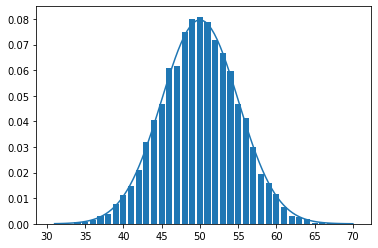

In [69]:
make_hist(0.5, 100, 10000)